# 2 Development of Synthetic Demand
Building a synthetic demand function from an assumed near-standstill is approached by stacking various streched cosines, data points are then randomly chosen through stacking various distributions around the demand function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%pylab inline
pylab.rcParams["figure.figsize"] = (15, 6)

Populating the interactive namespace from numpy and matplotlib


## Demand Curve
### General Parameters

In [3]:
years = 3
N = 365 * years
x = np.arange(1, N)
np.random.seed(416)

### Weeks

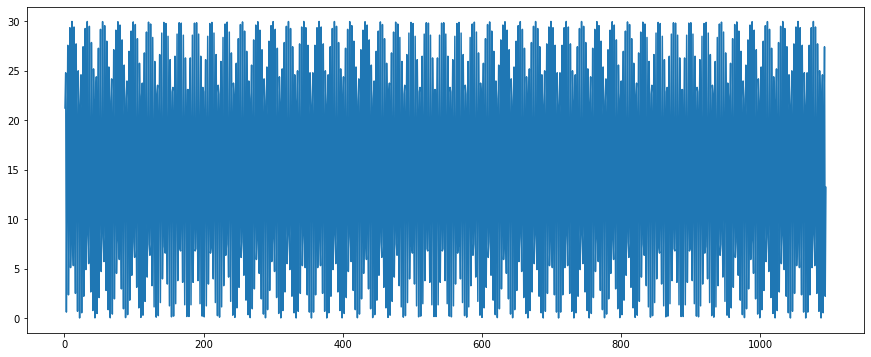

In [4]:
y_weekly = 15 * -np.cos(2 * x) + 15
plt.plot(x, y_weekly)
plt.show()

This is what weekly looks like for 4 weeks

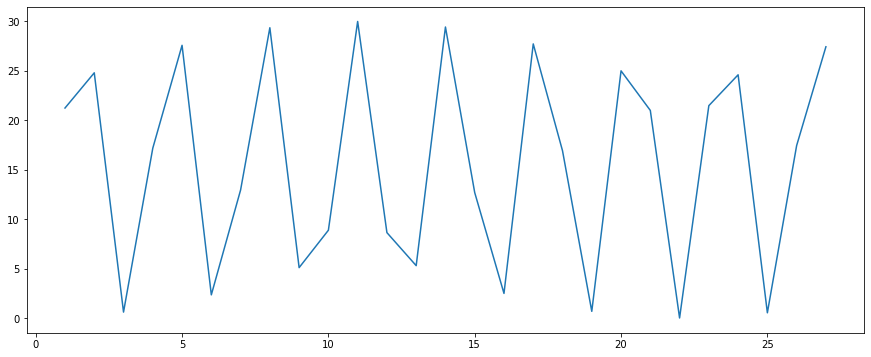

In [5]:
x_weekly_demo = np.arange(1, 28)
y_weekly_demo = 15 * -np.cos(2 * x_weekly_demo) + 15
plt.plot(x_weekly_demo, y_weekly_demo)
plt.show()

### Summer

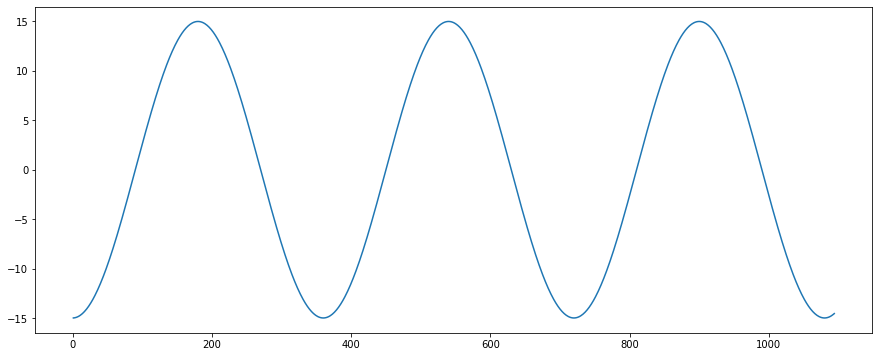

In [6]:
y_summer = 15 * -np.cos(1 / (360 / 2) * np.pi * x)
plt.plot(x, y_summer)
plt.show()

### Spring & Autumn Peaks

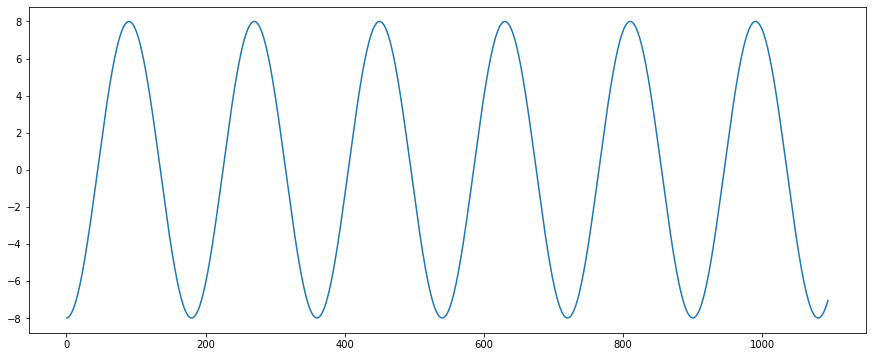

In [7]:
y_peaks = 8 * -np.cos((1 / (360 / 4)) * np.pi * x)
plt.plot(x, y_peaks)
plt.show()

### Short-term recovery from a near-standstill

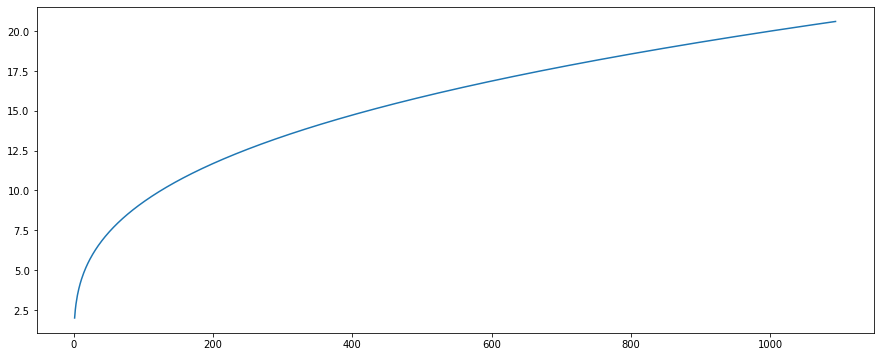

In [8]:
y_recover_short = x ** (1 / 3) * 2
plt.plot(x, y_recover_short)
plt.show()

### Long-term recovery

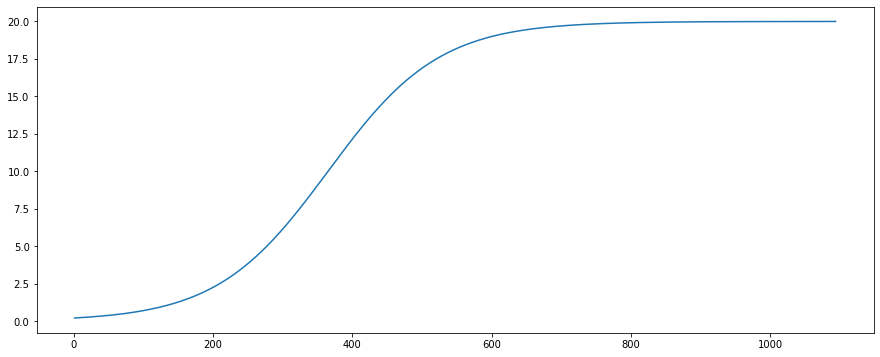

In [9]:
y_recover_long = 1 / (1 + np.exp(-(x - 365) / 80)) * 20
plt.plot(x, y_recover_long)
plt.show()

### Growth

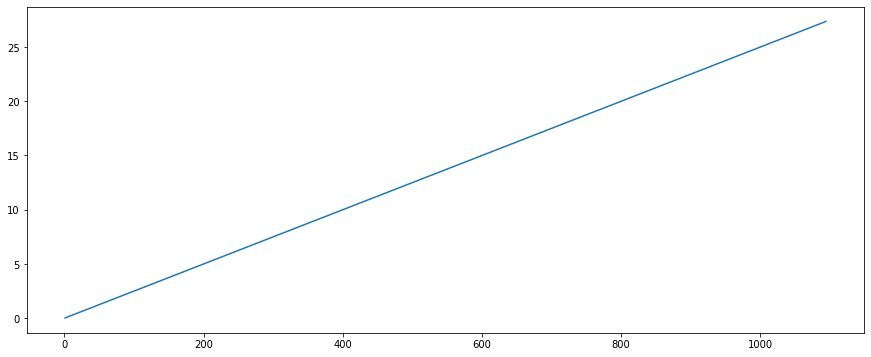

In [10]:
y_growth = x * 0.025
plt.plot(x, y_growth)
plt.show()

### Combine all to create reference curve

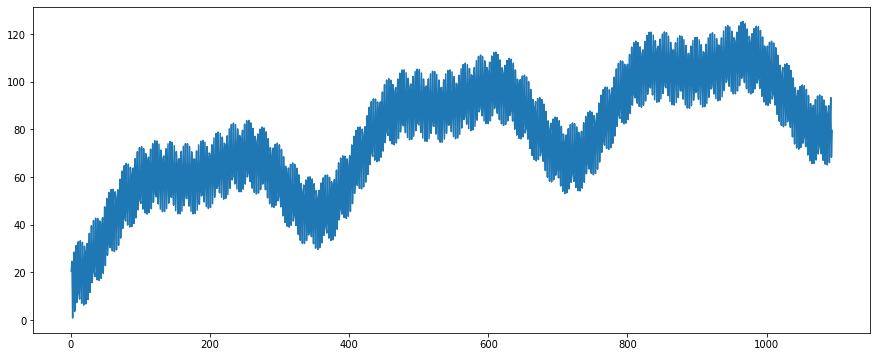

In [11]:
y_all = y_weekly + y_summer + y_peaks + y_recover_short + y_recover_long + y_growth + 20
plt.plot(x, y_all)
plt.show()

## Data around Demand Curve
### Poisson
Sensible with fluctuations at both ends

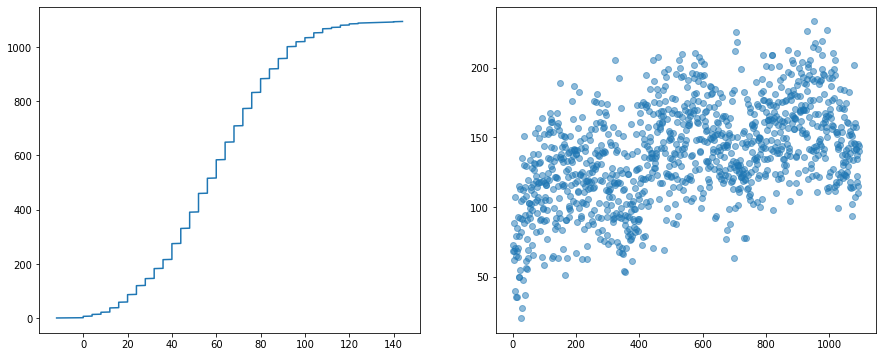

In [12]:
# cumulative poisson distribution
y_poisson = np.random.poisson(40, N - 1) * 4 - 100
plt.subplot(1, 2, 1)
plt.plot(np.sort(y_poisson), x)

y = y_all + y_poisson
y = y.clip(min=0)  # just in case a negative number occurs
plt.subplot(1, 2, 2)
plt.scatter(x, y, alpha=0.5)

plt.show()

### Gamma
Baseline is a bit stronger here

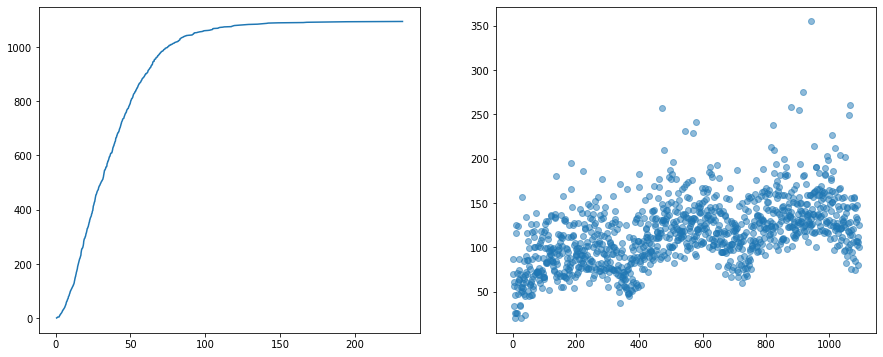

In [13]:
# cumulative poisson distribution around values
y_gamma = np.random.gamma(2, 20, N - 1)  # shape, scale, size
plt.subplot(1, 2, 1)
plt.plot(np.sort(y_gamma), x)

y = y_all + y_gamma
y = y.clip(min=0)  # just in case a negative number occurs
plt.subplot(1, 2, 2)
plt.scatter(x, y, alpha=0.5)

plt.show()

### Cauchy
Add some extreme outlier every now and then

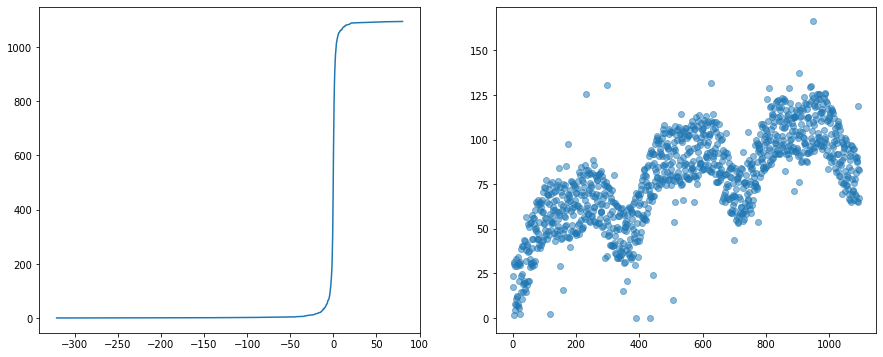

In [14]:
y_cauchy = np.random.standard_cauchy(N - 1)
plt.subplot(1, 2, 1)
plt.plot(np.sort(y_cauchy), x)

y = y_all + y_cauchy - np.mean(y_cauchy)
y = y.clip(min=0)  # just in case a negative number occurs
plt.subplot(1, 2, 2)
plt.scatter(x, y, alpha=0.5)

plt.show()

### Combined Synthetic Demand

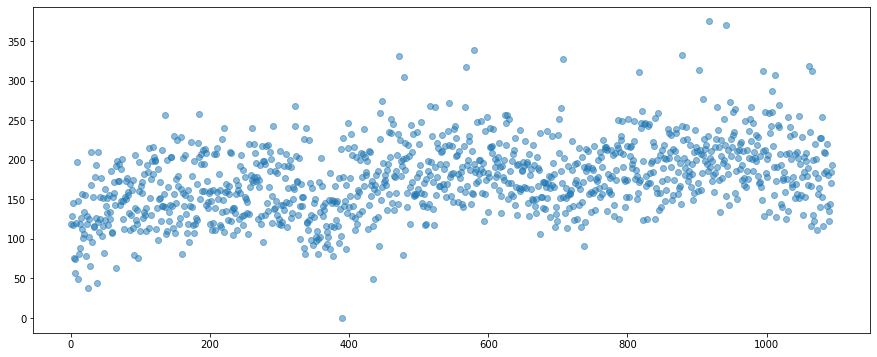

In [15]:
y = y_all + y_poisson + y_gamma + y_cauchy - np.mean(y_cauchy)
y = y.clip(min=0)  # just in case a negative number occurs
plt.scatter(x, y, alpha=0.5)
plt.show()

### Sudden Changes
At a random point in time there is a spike or dip with mean 100 and standard deviation of 50, negative values are clipped and

Variety of sudden changes

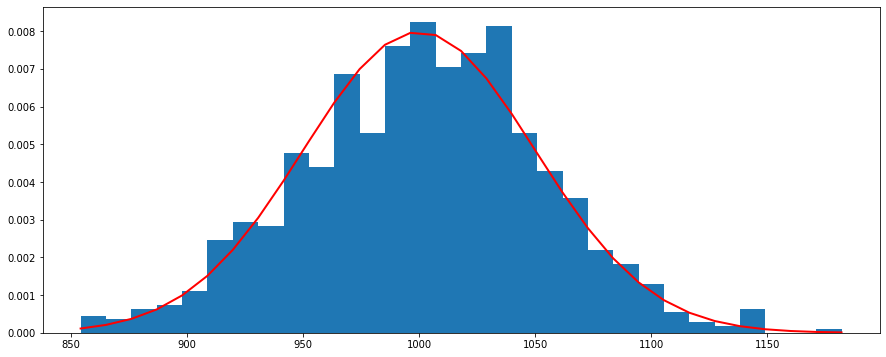

In [16]:
mu, sigma = 1000, 50
ndist = np.random.normal(mu, sigma, 1000)
ndist = ndist.clip(min=0)
count, bins, ignored = plt.hist(ndist, 30, density=True)
plt.plot(
    bins,
    1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-((bins - mu) ** 2) / (2 * sigma ** 2)),
    linewidth=2,
    color="r",
)
plt.show()

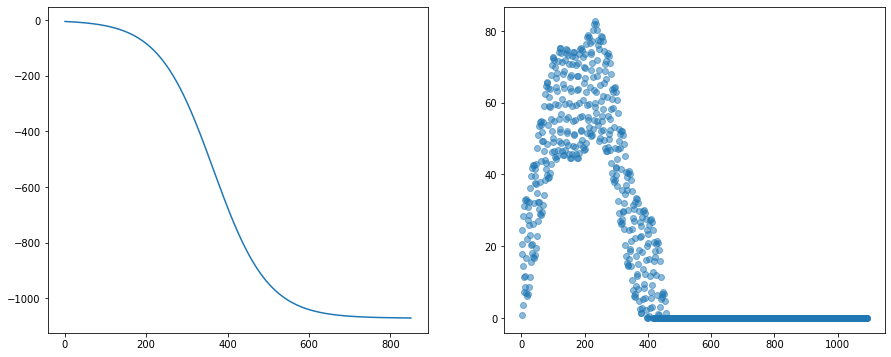

In [17]:
# start at a random point in time
start = np.random.choice(N)
magnitude = np.random.normal(1000, 50)  # .clip(min=0)
if np.random.rand() < 0.5:  # sudden change up or down
    magnitude = magnitude * -1
steepness = np.random.normal(
    50, 25
)  # random value from normal distribution within 25 standard deviations and mean 50
x_sudden = np.arange(1, N - start)
y_sudden = 1 / (1 + np.exp(-(x_sudden - 365) / steepness)) * magnitude
plt.subplot(1, 2, 1)
plt.plot(x_sudden, y_sudden)

y = y_all
y[start:] += y_sudden
y = y.clip(min=0)  # just in case a negative number occurs
plt.subplot(1, 2, 2)
plt.scatter(x, y, alpha=0.5)
plt.show()

### Combined Synthetic Demand with Sudden Change

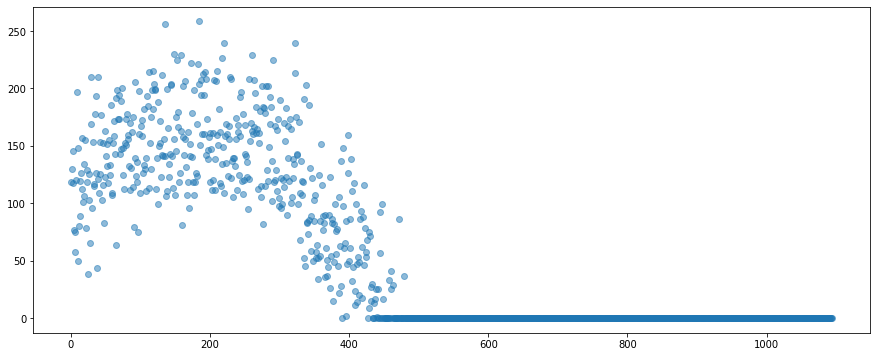

In [18]:
y = y_all + y_poisson + y_gamma + y_cauchy - np.mean(y_cauchy)
y[start:] += y_sudden
y = y.clip(min=0)  # just in case a negative number occurs
plt.scatter(x, y, alpha=0.5)
plt.show()

All ideas from above are taken to `demand.py` into the class `Demand` which easily generates synthtic demand arrays.